### All of Statistics - Chapter 8 Exercise 2
Conduct a simulation to compare the various bootstrap confidence interval methods. Let $n = 50$ and let $T(F) = \int (x - \mu)^3 dF(x) / \sigma^3$ be the skewness. Draw $Y_1,...,Y_n \sim N(0,1) $ and set $X_i = e^{Y_i}, i = 1,...,n. $ Construct the three types of bootstrap 95 percent intervals for $ T(F) $ from the data $X_1,...,X_n.$ Repeat this whole thing many times and estimate the true coverage of the three intervals.

In [65]:
n <- 50
B <- 100000
y <- rnorm(n, mean = 0, sd = 1)
x <- exp(y)

#### 1. Construct Estimator

In [66]:
get_skewness <- function(data) {
    n <- length(data)
    # Biased estimate of sd
    sigma <- sqrt(((n-1)/n) * var(data))
    mean <- mean(data)
    num <- sum((data - mean)^3)/n
    den <- sigma^3
    return (num/den)
}

In [67]:
theta <- get_skewness(x)

#### 2. Bootstrap Resampling

In [68]:
retheta <- numeric(B)
for (b in 1:B) {
    re_x <- sample(x, size = n, replace = TRUE)
    retheta[b] <- get_skewness(re_x)
}

In [69]:
alpha <- 0.05
est_se <- sqrt(var(retheta))
q_low <- as.numeric(quantile(retheta, probs = alpha/2))
q_high <- as.numeric(quantile(retheta, probs = 1 - (alpha/2)))

#### 3. Construct Confidence Interval

In [70]:
norm_ci <- c(theta-qnorm(1-(alpha/2))*est_se, theta+qnorm(1-(alpha/2))*est_se)

In [71]:
pivotal_ci <- c(2*theta-q_high, 2*theta-q_low)

In [72]:
percentile_ci <- c(q_low, q_high)

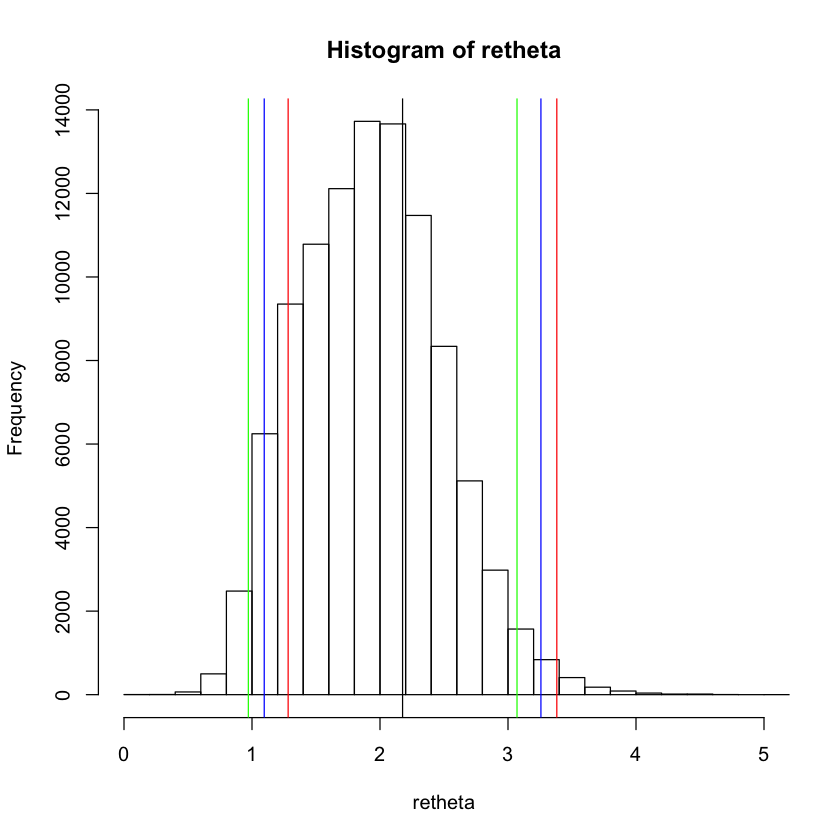

In [73]:
hist(retheta, breaks = 30, xlim = range(0:5))
abline(v = norm_ci , col= "blue")
abline(v = pivotal_ci, col = "red")
abline(v = percentile_ci, col = "green")
abline(v = theta, col = "black")

* Black line = Original Estimate
* Green line = Percentile Confidence Interval
* Blue line = Normal Confidence Interval
* Red line = Pivotal Confidence Interval
* When B = 2000 or less, the empirical distribution looks more like a bimodal
* When B = 2000 or less, different C.I. estimates have less agreement